In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from tqdm.auto import tqdm

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hanyang_repo/별따러가자/데이터 수집 수행/04.05_riding_labeled.csv')

# 전처리

## 라벨 안된 것 제거 

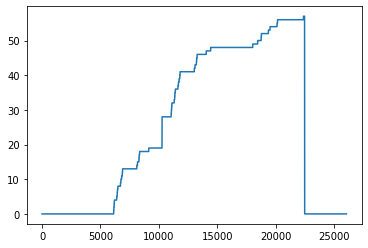

In [5]:
plt.plot(df['group'])

In [6]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [7]:
df = df.iloc[6125:22465]

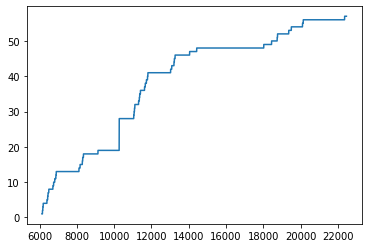

In [8]:
plt.plot(df['group'])

# 데이터 룩업 

(array([  1.,   0.,   5.,   0.,   0., 805.,   0.,   5.,   0.,   1.]),
 array([18. , 18.4, 18.8, 19.2, 19.6, 20. , 20.4, 20.8, 21.2, 21.6, 22. ]),
 <a list of 10 Patch objects>)

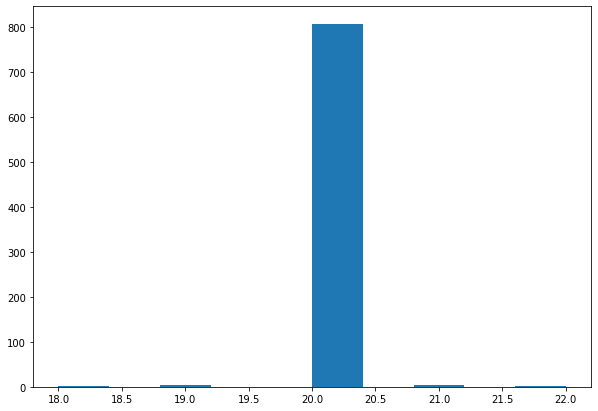

In [9]:
plt.figure(figsize=(10,7))
plt.hist(df['DATE'].value_counts())

# 평균화 작업 

In [10]:
timelines = np.unique(df['DATE'])
timeline = timelines[0]
col = 'ACCEL_X'
np.mean(df[df['DATE']==timeline][col])

-741.7

In [11]:
def make_mean(timeline,col):
  return_value = np.mean(df[df['DATE']==timeline][col])
  return return_value

In [12]:
df.columns

Index(['index', 'DATE', 'ID', 'ACCEL_X', 'ACCEL_Y', 'ACCEL_Z', 'GYRO_X',
       'GYRO_Y', 'GYRO_Z', 'PITCH', 'ROLL', 'LAT', 'LON', 'VELOCITY', 'ALT',
       'EVENT0', 'EVENT1', 'EVENT2', 'EVENT3', 'indo', 'chado', 'jumja',
       'group'],
      dtype='object')

In [13]:
for col in tqdm(df.columns[3:]):
  exec(f'{col}_list = []')
  for timeline in timelines:
    value = make_mean(timeline,col)
    exec(f'{col}_list.append(value)')
  exec(f'{col}_list = pd.DataFrame({col}_list)')
  exec(f"{col}_list['timeline'] = timelines")

  0%|          | 0/20 [00:00<?, ?it/s]

In [14]:
mean_df = []
mean_df.append(timelines)
for col in df.columns[3:]:
  exec(f'mean_df.append({col}_list[0])')
mean_df = pd.DataFrame(np.array(mean_df).T)
mean_df[0] = pd.to_datetime(mean_df[0])

In [15]:
columns = df.columns[2:]
columns = np.array(columns)
columns[0] = 'timeline'
mean_df.columns = columns

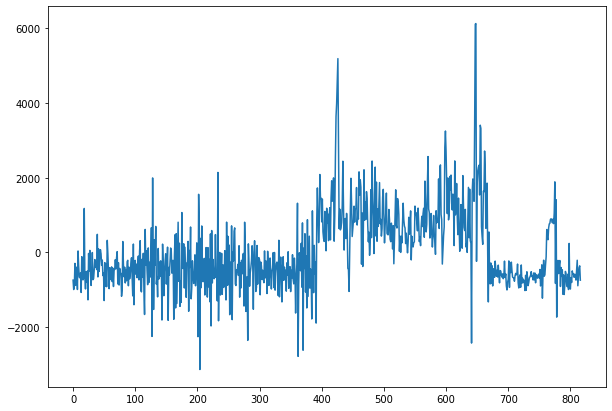

In [16]:
plt.figure(figsize=(10,7))
plt.plot(mean_df['ACCEL_X'])
plt.show()

#시각화 및 확인 

## 전체 plot 

(array([  1.,   0.,   5.,   0.,   0., 805.,   0.,   5.,   0.,   1.]),
 array([18. , 18.4, 18.8, 19.2, 19.6, 20. , 20.4, 20.8, 21.2, 21.6, 22. ]),
 <a list of 10 Patch objects>)

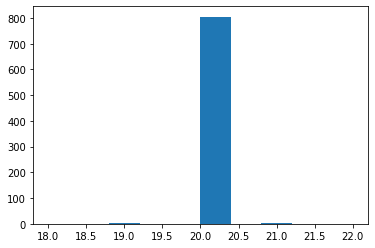

In [17]:
plt.hist(df['DATE'].value_counts())

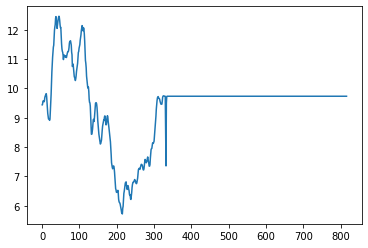

In [18]:
plt.plot(mean_df['VELOCITY'])

<Figure size 2160x1080 with 0 Axes>

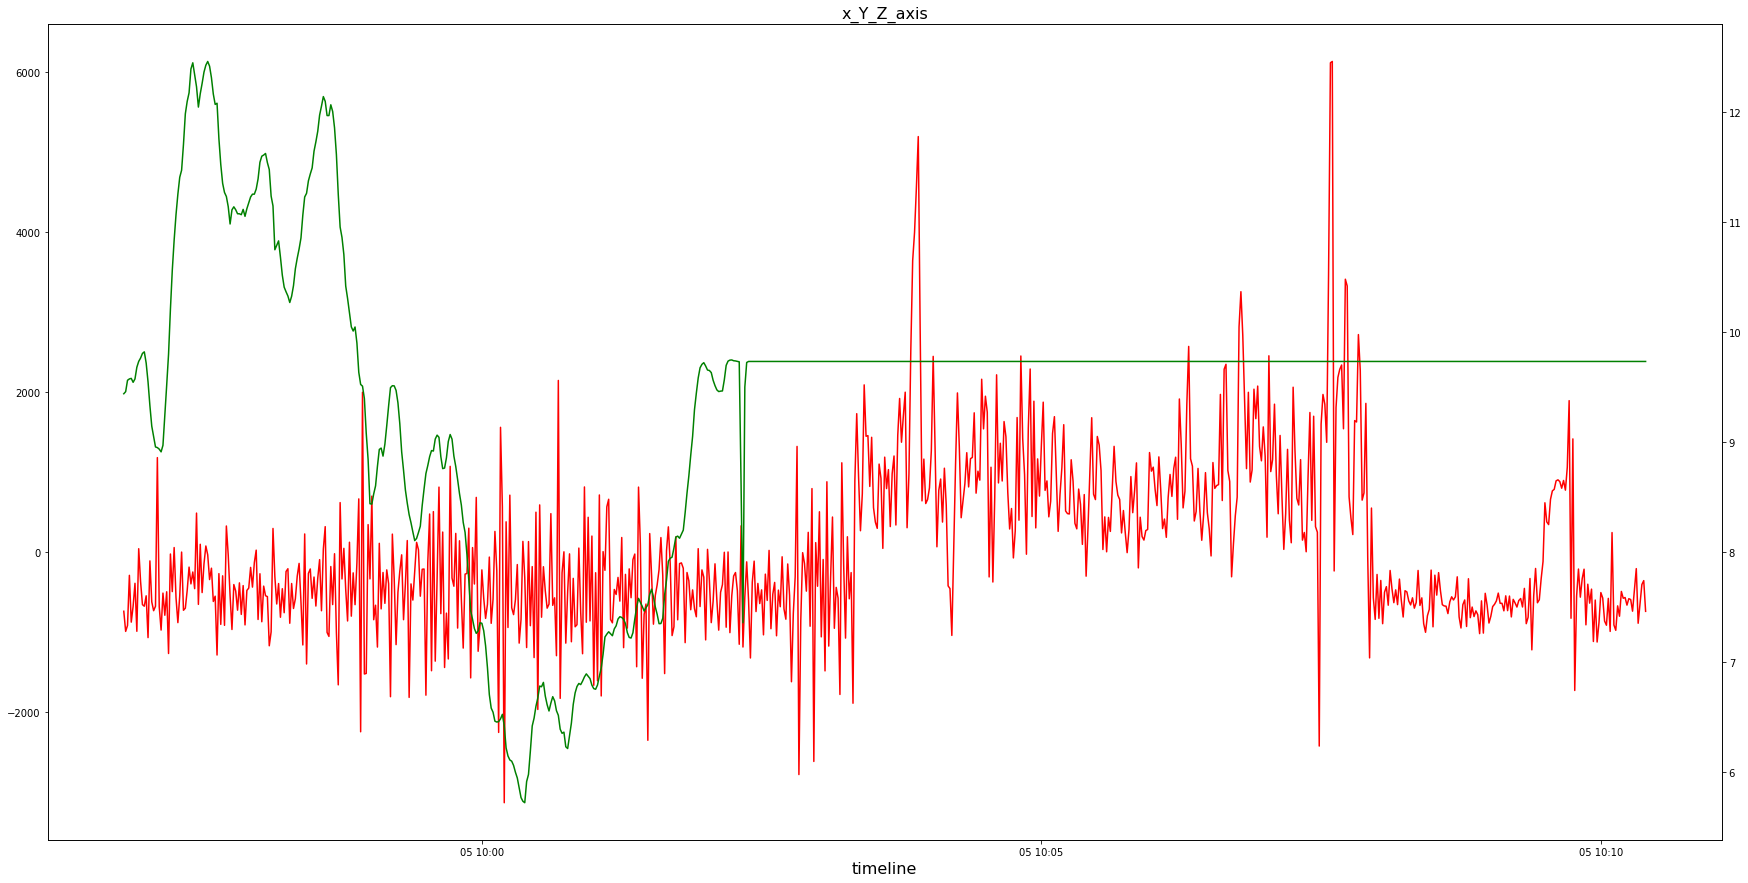

In [23]:
plt.figure(figsize=(30,15))
fig, ax1 = plt.subplots(figsize=(30,15))
ax1.set_title('x_Y_Z_axis',fontsize=16)
ax1.set_xlabel('timeline',fontsize=16)
ax1.plot(ACCEL_X_list['timeline'],ACCEL_X_list[0],color='red',label='X_axis')

# ax2 = ax1.twinx()
# ax2.plot(ACCEL_X_list['timeline'],ACCEL_Y_list[0],color='blue',label='Y_axis')

# ax3 = ax1.twinx()
# ax3.plot(ACCEL_X_list['timeline'],ACCEL_Z_list[0],color='black',label='Z_axis')

ax4 = ax1.twinx()
ax4.plot(ACCEL_X_list['timeline'],VELOCITY_list[0],color='green',label='velocity')

plt.show()


## 유형 별 통계 

In [ ]:
mean_df

,timeline,ACCEL_X,ACCEL_Y,ACCEL_Z,GYRO_X,GYRO_Y,GYRO_Z,PITCH,ROLL,LAT,...,VELOCITY,ALT,EVENT0,EVENT1,EVENT2,EVENT3,indo,chado,jumja,group
0,2022-04-05 09:56:48,-741.7,1068.55,16474.55,46.8,13.5,-667.6,-2.4,-3.4,37.545248,...,9.43772,57.100002,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,2022-04-05 09:56:49,-993.25,1297.3,16416.1,4.75,-117.25,-200.8,-4.35,-0.7,37.545224,...,9.456686,57.100002,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
2,2022-04-05 09:56:50,-919.0,1221.8,16453.35,-3.25,-103.75,104.2,-4.2,1.2,37.545197,...,9.560064,57.100002,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
3,2022-04-05 09:56:51,-292.55,1433.1,16141.25,6.35,64.95,-342.95,-4.05,0.5,37.545171,...,9.572433,57.100002,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0
4,2022-04-05 09:56:52,-877.55,1083.2,16436.8,15.6,-3.2,77.8,-4.65,2.1,37.545155,...,9.577348,57.100002,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
812,2022-04-05 10:10:20,-891.65,-170.95,16000.35,57.4,-220.6,133.35,-1.6,4.3,37.547943,...,9.731254,77.79615,0.0,0.0,0.05,0.0,0.0,0.0,1.0,57.0
813,2022-04-05 10:10:21,-650.3,334.25,16877.8,5.25,20.3,302.95,-3.4,7.9,37.547943,...,9.731254,77.79615,0.0,0.0,0.0,0.1,0.0,0.0,1.0,57.0
814,2022-04-05 10:10:22,-407.4,1163.95,15945.55,-32.1,-47.65,-61.05,-1.5,3.75,37.547943,...,9.731254,77.79615,0.0,0.0,0.0,0.0,0.0,0.0,1.0,57.0
815,2022-04-05 10:10:23,-358.65,922.6,15595.9,19.9,122.45,258.1,-0.7,5.25,37.547943,...,9.731254,77.79615,0.0,0.0,0.0,0.0,0.0,0.0,1.0,57.0


In [ ]:
mean_df[mean_df['jumja']==1].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,timeline,ACCEL_X,ACCEL_Y,ACCEL_Z,GYRO_X,GYRO_Y,GYRO_Z,PITCH,ROLL,LAT,...,VELOCITY,ALT,EVENT0,EVENT1,EVENT2,EVENT3,indo,chado,jumja,group
count,49,49.0,49.00,49.00,49.0,49.0,49.0,49.0,49.00,49.000000,...,49.000000,49.00000,49.0,49.0,49.0,49.0,49.0,49.0,49.0,49.0
unique,49,49.0,49.00,49.00,48.0,49.0,49.0,47.0,46.00,22.000000,...,22.000000,15.00000,1.0,1.0,3.0,2.0,2.0,2.0,1.0,19.0
top,2022-04-05 09:56:48,-741.7,1068.55,16474.55,-17.0,13.5,-667.6,-0.8,8.35,37.547943,...,9.731254,77.79615,0.0,0.0,0.0,0.0,0.0,0.0,1.0,48.0
freq,1,1.0,1.00,1.00,2.0,1.0,1.0,2.0,2.00,28.000000,...,28.000000,28.00000,49.0,49.0,46.0,48.0,25.0,48.0,49.0,13.0
first,2022-04-05 09:56:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2022-04-05 10:10:24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
mean_df[mean_df['chado']==1].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,timeline,ACCEL_X,ACCEL_Y,ACCEL_Z,GYRO_X,GYRO_Y,GYRO_Z,PITCH,ROLL,LAT,...,VELOCITY,ALT,EVENT0,EVENT1,EVENT2,EVENT3,indo,chado,jumja,group
count,128,128.00,128.0,128.0,128.00,128.0,128.0,128.00,128.00,128.000000,...,128.000000,128.00000,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0
unique,128,128.00,128.0,128.0,123.00,127.0,126.0,96.00,110.00,20.000000,...,21.000000,18.00000,1.0,1.0,2.0,1.0,2.0,1.0,2.0,20.0
top,2022-04-05 09:56:49,-993.25,1297.3,16416.1,-20.45,-30.4,-158.6,-4.45,8.35,37.547943,...,9.731254,77.79615,0.0,0.0,0.0,0.0,0.0,1.0,0.0,52.0
freq,1,1.00,1.0,1.0,2.00,2.0,2.0,4.00,4.00,109.000000,...,108.000000,108.00000,128.0,128.0,127.0,128.0,68.0,128.0,127.0,30.0
first,2022-04-05 09:56:49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2022-04-05 10:08:28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
